# Modules

In [16]:
import numpy as np
import torch
from torch import nn 
from torch import tensor
from torch.autograd import grad
from datetime import datetime
import matplotlib.pyplot as plt
import importlib
import HiDeNN_file as HDNN
importlib.reload(HDNN)

<module 'HiDeNN_file' from '/home/pecazeco/IC/Git_repository/HiDeNN_file.py'>

# Tests without the model

In [17]:
class Rede:
    def __init__(self):
        self.w = tensor([[1,1]], requires_grad=True, dtype=torch.float64)
    @property
    def a(self):
        self.__a = 2 * self.w[-1,-1]
        return self.__a
    @property
    def b(self):
        self.__b = 3 * self.w[0,0]
        return self.__b
    
lossfunc = nn.MSELoss()

y = tensor([[15]], dtype=torch.float64)
model = Rede()
for e in range(300):
    out = model.a * tensor([[2]], dtype=torch.float64) + model.b * tensor([[5]], dtype=torch.float64)
    optimizer = torch.optim.SGD([model.w], lr=1e-3)
    optimizer.zero_grad()
    loss = lossfunc(out, y)
    loss.backward(retain_graph=True)
    optimizer.step()
model.w, model.a, model.b, out


(tensor([[0.7510, 0.9336]], dtype=torch.float64, requires_grad=True),
 tensor(1.8672, dtype=torch.float64, grad_fn=<MulBackward0>),
 tensor(2.2531, dtype=torch.float64, grad_fn=<MulBackward0>),
 tensor([[15.0000]], dtype=torch.float64, grad_fn=<AddBackward0>))

In [18]:
A = tensor(np.linspace(0, 1, 6), requires_grad=True)
A = A.reshape(1,-1)
A[0,2:]

tensor([0.4000, 0.6000, 0.8000, 1.0000], dtype=torch.float64,
       grad_fn=<SliceBackward0>)

# Tests on the model

In [19]:
equation = [1, 0, 0, lambda x: 1] # [k, c, b, f]
bound_conds = [0,0]
dom = np.linspace(0,1,100)
u_exact = [-x**2/2 + 0.5*x for x in dom]

model = HDNN.HiDeNN_for_FEM(dom, 6, equation, bound_conds)

<SelectBackward0 object at 0x7f64f5271480> self.nodes[i]
<ViewBackward0 object at 0x7f64f18c8a90> self.x_current
None self.u
<MmBackward0 object at 0x7f64f18c8a90> out grad
False out
<ViewBackward0 object at 0x7f64f18c8a90> t
<ViewBackward0 object at 0x7f64f18c8a90> self.x_current
None self.u
<MmBackward0 object at 0x7f64f18c8a90> out grad
False out
<ViewBackward0 object at 0x7f64f18c8a90> self.x_current
None self.u
<MmBackward0 object at 0x7f64f18c8a90> out grad
False out
<ViewBackward0 object at 0x7f64f18c8a90> self.x_current
None self.u
<MmBackward0 object at 0x7f64f18c8a90> out grad
False out
<ViewBackward0 object at 0x7f64f18c8a90> self.x_current
None self.u
<MmBackward0 object at 0x7f64f18c8a90> out grad
False out
<ViewBackward0 object at 0x7f64f18c8a90> self.x_current
None self.u
<MmBackward0 object at 0x7f64f18c8a90> out grad
False out
<CatBackward0 object at 0x7f64f18c8a90> grad shape func arr
<SelectBackward0 object at 0x7f64f18c8a90> self.nodes[i]
<ViewBackward0 object at 0x

<Figure size 640x480 with 0 Axes>

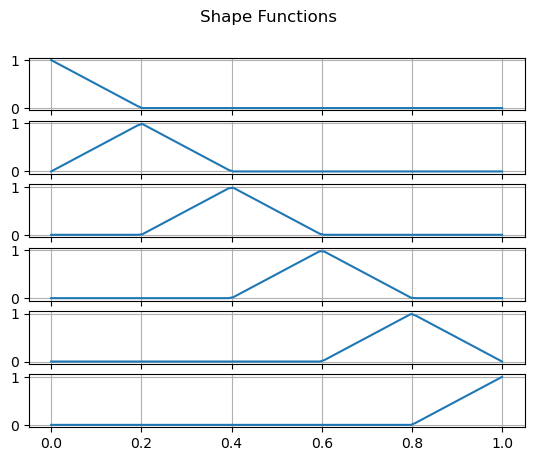

In [20]:
model.plot_shape_functions()

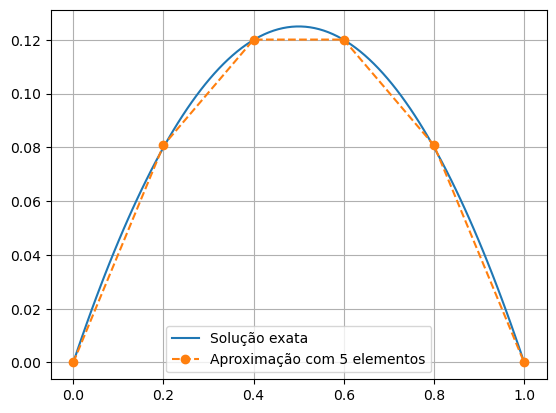

In [21]:
model.plot_u_exact_vs_u_aprox(u_exact)

In [22]:
model.displacement_arr, model.K, model.F, model.nodes, len(model.u_aprox_arr)

(tensor([3.9596e-12, 8.0775e-02, 1.2012e-01, 1.2012e-01, 8.0775e-02, 3.9596e-12],
        dtype=torch.float64, grad_fn=<LinalgSolveExBackward0>),
 tensor([[ 1.0000e+11, -4.8413e+00, -4.0812e-02,  0.0000e+00,  0.0000e+00,
           0.0000e+00],
         [-4.8413e+00,  9.7490e+00, -4.8464e+00, -6.1218e-02,  0.0000e+00,
           0.0000e+00],
         [-4.0812e-02, -4.8464e+00,  9.7541e+00, -4.8056e+00, -6.1218e-02,
           0.0000e+00],
         [ 0.0000e+00, -6.1218e-02, -4.8056e+00,  9.7541e+00, -4.8464e+00,
          -4.0812e-02],
         [ 0.0000e+00,  0.0000e+00, -6.1218e-02, -4.8464e+00,  9.7490e+00,
          -4.8413e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00, -4.0812e-02, -4.8413e+00,
           1.0000e+11]], dtype=torch.float64, grad_fn=<CopySlices>),
 tensor([0.0000, 0.1980, 0.1980, 0.1980, 0.1980, 0.0000], dtype=torch.float64,
        grad_fn=<CopySlices>),
 tensor([0.0000, 0.2000, 0.4000, 0.6000, 0.8000, 1.0000], dtype=torch.float64,
        requires_grad=True

In [23]:
model.u_aprox_arr

tensor([3.9596e-12, 4.0795e-03, 8.1590e-03, 1.2239e-02, 1.6318e-02, 2.0398e-02,
        2.4477e-02, 2.8557e-02, 3.2636e-02, 3.6716e-02, 4.0795e-02, 4.4875e-02,
        4.8954e-02, 5.3034e-02, 5.7113e-02, 6.1193e-02, 6.5272e-02, 6.9352e-02,
        7.3431e-02, 7.7511e-02, 8.1172e-02, 8.3159e-02, 8.5146e-02, 8.7133e-02,
        8.9120e-02, 9.1107e-02, 9.3094e-02, 9.5081e-02, 9.7068e-02, 9.9055e-02,
        1.0104e-01, 1.0303e-01, 1.0502e-01, 1.0700e-01, 1.0899e-01, 1.1098e-01,
        1.1296e-01, 1.1495e-01, 1.1694e-01, 1.1892e-01, 1.2012e-01, 1.2012e-01,
        1.2012e-01, 1.2012e-01, 1.2012e-01, 1.2012e-01, 1.2012e-01, 1.2012e-01,
        1.2012e-01, 1.2012e-01, 1.2012e-01, 1.2012e-01, 1.2012e-01, 1.2012e-01,
        1.2012e-01, 1.2012e-01, 1.2012e-01, 1.2012e-01, 1.2012e-01, 1.2012e-01,
        1.1892e-01, 1.1694e-01, 1.1495e-01, 1.1296e-01, 1.1098e-01, 1.0899e-01,
        1.0700e-01, 1.0502e-01, 1.0303e-01, 1.0104e-01, 9.9055e-02, 9.7068e-02,
        9.5081e-02, 9.3094e-02, 9.1107e-

In [24]:
model.forward()

<SelectBackward0 object at 0x7f64f1384790> self.nodes[i]
<ViewBackward0 object at 0x7f64f1384790> self.x_current
<SelectBackward0 object at 0x7f64f1384790> self.u
<MmBackward0 object at 0x7f64f18cbb20> out grad
False out
<ViewBackward0 object at 0x7f64f18cbb20> t
<ViewBackward0 object at 0x7f64f18cbb20> self.x_current
<SelectBackward0 object at 0x7f64f18cbb20> self.u
<MmBackward0 object at 0x7f64f18cbb20> out grad
False out
<ViewBackward0 object at 0x7f64f18cbb20> self.x_current
<SelectBackward0 object at 0x7f64f18cbb20> self.u
<MmBackward0 object at 0x7f64f18cbb20> out grad
False out
<ViewBackward0 object at 0x7f64f18cbb20> self.x_current
<SelectBackward0 object at 0x7f64f18cbb20> self.u
<MmBackward0 object at 0x7f64f18cbb20> out grad
False out
<ViewBackward0 object at 0x7f64f18cbb20> self.x_current
<SelectBackward0 object at 0x7f64f18cbb20> self.u
<MmBackward0 object at 0x7f64f18cbb20> out grad
False out
<ViewBackward0 object at 0x7f64f16e7dc0> self.x_current
<SelectBackward0 object 

tensor([[3.9596e-12],
        [4.0795e-03],
        [8.1590e-03],
        [1.2239e-02],
        [1.6318e-02],
        [2.0398e-02],
        [2.4477e-02],
        [2.8557e-02],
        [3.2636e-02],
        [3.6716e-02],
        [4.0795e-02],
        [4.4875e-02],
        [4.8954e-02],
        [5.3034e-02],
        [5.7113e-02],
        [6.1193e-02],
        [6.5272e-02],
        [6.9352e-02],
        [7.3431e-02],
        [7.7511e-02],
        [8.1172e-02],
        [8.3159e-02],
        [8.5146e-02],
        [8.7133e-02],
        [8.9120e-02],
        [9.1107e-02],
        [9.3094e-02],
        [9.5081e-02],
        [9.7068e-02],
        [9.9055e-02],
        [1.0104e-01],
        [1.0303e-01],
        [1.0502e-01],
        [1.0700e-01],
        [1.0899e-01],
        [1.1098e-01],
        [1.1296e-01],
        [1.1495e-01],
        [1.1694e-01],
        [1.1892e-01],
        [1.2012e-01],
        [1.2012e-01],
        [1.2012e-01],
        [1.2012e-01],
        [1.2012e-01],
        [1

In [25]:
model.train()

<SelectBackward0 object at 0x7f64f2680b50> self.nodes[i]
<ViewBackward0 object at 0x7f64f2680b50> self.x_current
None self.u
<MmBackward0 object at 0x7f64f18c8a90> out grad
False out
<ViewBackward0 object at 0x7f64f18c8a90> t
<ViewBackward0 object at 0x7f64f18c8a90> self.x_current
None self.u
<MmBackward0 object at 0x7f64f18c8a90> out grad
False out
<ViewBackward0 object at 0x7f64f18c8a90> self.x_current
None self.u
<MmBackward0 object at 0x7f64f18c8a90> out grad
False out
<ViewBackward0 object at 0x7f64f18c8a90> self.x_current
None self.u
<MmBackward0 object at 0x7f64f18c8a90> out grad
False out
<ViewBackward0 object at 0x7f64f18c8a90> self.x_current
None self.u
<MmBackward0 object at 0x7f64f18c8a90> out grad
False out
<ViewBackward0 object at 0x7f64f5d67e20> self.x_current
None self.u
<MmBackward0 object at 0x7f64f5d67e20> out grad
False out
tensor([[ 1.0000e+11, -1.9285e+00, -2.5375e+00,  2.5375e+00,  1.9285e+00,
         -1.9546e+01],
        [-1.9285e+00,  8.1372e-01, -8.0723e-01,

tensor(9.6013, dtype=torch.float64, grad_fn=<MseLossBackward0>)

In [26]:
model.train(epochs=200, lr=0.5)

<SelectBackward0 object at 0x7f64f16e6f20> self.nodes[i]
<ViewBackward0 object at 0x7f64f16e6f20> self.x_current
None self.u
<MmBackward0 object at 0x7f64f16e7dc0> out grad
False out
<ViewBackward0 object at 0x7f64f16e7dc0> t
<ViewBackward0 object at 0x7f64f16e7dc0> self.x_current
None self.u
<MmBackward0 object at 0x7f64f16e7dc0> out grad
False out
<ViewBackward0 object at 0x7f64f16e7dc0> self.x_current
None self.u
<MmBackward0 object at 0x7f64f16e7dc0> out grad
False out
<ViewBackward0 object at 0x7f64f16e7dc0> self.x_current
None self.u
<MmBackward0 object at 0x7f64f16e7dc0> out grad
False out
<ViewBackward0 object at 0x7f64f16e7dc0> self.x_current
None self.u
<MmBackward0 object at 0x7f64f16e7dc0> out grad
False out
<ViewBackward0 object at 0x7f64f5271480> self.x_current
None self.u
<MmBackward0 object at 0x7f64f5271480> out grad
False out
tensor([[ 1.0000e+11, -1.9680e-03,  0.0000e+00,  5.7857e-04, -5.7857e-04,
          1.0531e-02],
        [-1.9680e-03,  1.9680e-03,  0.0000e+00,

_LinAlgError: torch.linalg.solve: The solver failed because the input matrix is singular.

(None,
 tensor([0.0000, 0.2000, 0.4000, 0.6000, 0.8000, 1.0000], dtype=torch.float64,
        requires_grad=True),
 tensor([3.9596e-12, 8.0775e-02, 1.2012e-01, 1.2012e-01, 8.0775e-02, 3.9596e-12],
        dtype=torch.float64),
 tensor([[ 1.0000e+11, -4.8413e+00, -4.0812e-02,  0.0000e+00,  0.0000e+00,
           0.0000e+00],
         [-4.8413e+00,  9.7490e+00, -4.8464e+00, -6.1218e-02,  0.0000e+00,
           0.0000e+00],
         [-4.0812e-02, -4.8464e+00,  9.7541e+00, -4.8056e+00, -6.1218e-02,
           0.0000e+00],
         [ 0.0000e+00, -6.1218e-02, -4.8056e+00,  9.7541e+00, -4.8464e+00,
          -4.0812e-02],
         [ 0.0000e+00,  0.0000e+00, -6.1218e-02, -4.8464e+00,  9.7490e+00,
          -4.8413e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00, -4.0812e-02, -4.8413e+00,
           1.0000e+11]], dtype=torch.float64),
 tensor([0.0000, 0.1980, 0.1980, 0.1980, 0.1980, 0.0000], dtype=torch.float64))

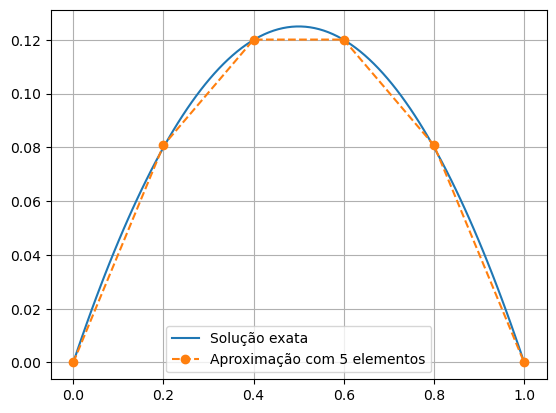

In [ ]:
model.plot_u_exact_vs_u_aprox(u_exact), model.nodes, model.displacement_arr, model.K, model.F